# Holt - winters

Là một phương pháp ước lượng chuỗi tgian dựa vào trung bình gia quyền các giá trị trong quá khứ. 

## Smoothing parameters

### Smoothing level ($\alpha$)

Tham số làm trơn chuỗi dữ liệu. $\alpha$ càng gần 1 thì chuỗi làm trơn dao động càng giống chuỗi gốc và ngược lại. Hay có thể nói $\alpha$ là trọng số quyết định ước lượng hiện tại dựa trên giá trị trong quá khứ như thế nào: $\alpha$ càng gần 1 thì giá trị gần với hiện tại càng quan trọng, gần 0 thì các giá trị trong quá khứ được coi trọng hơn.

\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   
\end{equation}

Components form:

\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}

Trong phương trình ước lượng $\ell_{t}$ ta cần có $\alpha$ và $\ell_{t-1}$ - được gọi là giá trị khởi tạo (initial value). Cách chọn 2 tham số trên dựa vào kinh nghiệm cá nhân?? và chọn sao cho sai số là cực tiểu (mininum SSE) => cần có công cụ để ước lượng được 2 tham số này

**Tham khảo:** 4 cách tính $\ell_{0}$ 
- Cách 1: Gán luôn bằng giá trị đầu tiên của chuỗi, $\ell_{0}$ = $\ell_{1}$. Cách này rất tệ vì như thế giá trị đầu tiên sẽ ảnh hưởng cực mạnh tới giá trị dự báo.
- Cách 2: Tính trung bình của 1 vài giá trị đầu tiên (không có quy định là bao nhiêu giá trị nhưng thường là nhỏ hơn 10 giá trị đầu tiên) 
- Cách 3: Backcast =)))) đảo ngược lại chuỗi tgian và dự báo cho quá khứ.
    - B1: Đảo ngược lại chuỗi tgian (chuỗi T2)
    - B2: Tính giá trị khởi tạo cho chuỗi T2 bằng cách 2
    - B3: Áp dụng exponential smoothing cho chuỗi T2 và ước lượng ra $\alpha$
    - B4: Sử dụng $\alpha$ vừa ước lượng ra để tính giá trị $\ell_{t}$ cho giá trị cuối cùng -> đây chính là giá trị khởi tạo của chuỗi đầu tiên
- Cách 4: Cực tiểu hóa sai số SSE - best way

### Smoothing slope ($\beta$)

\begin{align*}
  \text{Forecast equation}&& \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} \\
  \text{Level equation}   && \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  \text{Trend equation}   && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1},
\end{align*}

$\ell_{t}$ : giá trị của $y_t$ sau khi đã làm trơn với $\alpha$

$b_{t}$ : ước lượng của xu thế của chuỗi tgian tại thời kỳ t. **Phần xu thế ở thời kỳ t được hiểu là chênh lệch giữa $\ell_t$ và $\ell_{t-1}$** - sai phân ??

$\beta^*$: tham số làm trơn của xu thế (smoothing slope) - $\beta^*$ càng nhỏ thì xu thế càng ít thay đổi theo thời gian. 

$b_{t-1}$: giá trị khởi tạo của xu thế - cách tính tương tự $\ell_{t-1}$

### Damped Trend ($\phi$)

Xu thế thông thường sẽ có dạng linear nhưng trong một số trường hợp, xu thế của nó có thể ở dạng đường cong đi xuống (damping) chính vì vậy ta thêm một hệ số giảm xu thế vào trong phương trình ước lượng $y_t$ - damping parameter

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t} \\
  \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)\phi b_{t-1}.
\end{align*}

- Nếu $\phi$ = 1 thì xu thế là linear
- 0<$\phi$<1 thì xu thế sẽ giảm dần về hằng số trong tương lai ?? và các dự đoán trong tương lai gần có xu thế còn trong tương lai xa sẽ là 1 hằng số


### Smoothing seasonal ($\gamma$)

- Mô hình cộng: phần mùa vụ chính là chênh lệch giữa $y_t$ và $\ell_t$

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}

- Mô hình nhân: Phần mùa vụ bằng thương của $\ell_t$ và $y_t$

\begin{align*}
  \hat{y}_{t+h|t} &= (\ell_{t} + hb_{t})s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1}                \\
  s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m}
\end{align*}

$s_{t}$ : Ước lượng của phần mùa vụ trong chuỗi thời gian tại thời kỳ t. Phần mùa vụ ở thời kỳ t là chênh lệch giữa $y_t$ và $\ell_t$

$\gamma$ : tham số làm trơn của mùa vụ. $\gamma$ càng nhỏ nghĩa là mùa vụ càng ít thay đổi theo thời gian

$s_{t-m}$ : giá trị khởi tạo của mùa vụ. Số lượng giá trị khởi tạo của mùa vụ phụ thuộc vào số mùa vụ, VD có 4 quý thì cần 4 giá trị khởi tạo cho mỗi quý. 

### State space models


Ý tưởng chính của mô hình này là đo lường được những thành phần 'ẩn dấu' trong chuỗi thời gian, các quan sát hiện tại là kết quả của những kết hợp tuyến tính giữa các thành phần (state) đó. 

Mô hình holt-winter là 1 dạng của state space models. 
Mỗi mô hình trong state space models chứa 1 phương trình (measurement equation) đo lường các quan sát của chuỗi (Yt) và các phương trình con (state equations) đo lường các thành phần không quan sát được (các state như level, trend, seasonal) thay đổi như thế nào qua thời gian. 

Tuy nhiên mô hình holt-winters chỉ sử dụng để dự báo điểm (point forecast), nếu muốn dự báo khoảng (inteval prediction) thì cần sử dụng mô hình ETS (error, trend, seasonal) - chính là mô hình holt-winters nhưng khác nhau về components (thay level bằng error)

Mỗi method của mô hình holt-winter sẽ chia thành 2 dạng sai số: sai số dạng cộng và sai số dạng nhân. Bản chất là giống nhau nhưng cách tính khác nhau sẽ cho những khoảng dự báo khác nhau (còn dự báo điểm thì giống nhau)
- Sai số dạng cộng: chênh lệch có trọng số giữa yt và lt-1
- Sai số dạng nhân: sai số dạng cộng chia cho lt-1



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es
from statsmodels.tsa.seasonal import seasonal_decompose

# Quantity purchase prediction with BT size 8/12.3 - MPHG

In [2]:
suvo_quantity = pd.read_excel('MPHG_suvo_quantity.xlsx')
suvo_quantity.head()

,std_factory,std_type,std_size,std_quantity_kg,std_active_date,dt_year,dt_quarter,dt_month,dt_week,dt_quarter_int,dt_month_int
0,Hậu Giang,Sú Vỏ,8/12.3,379.49,2019-10-28,2019,2019/3,2019/10,2019/10/43,3,10
1,Hậu Giang,Sú Vỏ,8/12.3,669.51,2019-10-29,2019,2019/3,2019/10,2019/10/43,3,10
2,Hậu Giang,Sú Vỏ,8/12.3,337.17,2019-10-30,2019,2019/3,2019/10,2019/10/43,3,10
3,Hậu Giang,Sú Vỏ,8/12.3,603.74,2019-10-31,2019,2019/3,2019/10,2019/10/43,3,10
4,Hậu Giang,Sú Vỏ,8/12.3,189.82,2019-11-01,2019,2019/3,2019/11,2019/11/43,3,11


In [3]:
suvo_quantity = suvo_quantity[['std_quantity_kg','std_active_date']]
suvo_quantity.columns = ['quantity','date']

In [4]:
date = pd.DataFrame(pd.date_range('2019-10-28', '2020-07-02'))
date.columns=['date']

In [5]:
quantity = suvo_quantity.merge(date, how='right').sort_values(by=['date'])

In [6]:
quantity['quantity'] = quantity['quantity'].fillna(0.1)
quantity = quantity.set_index('date')

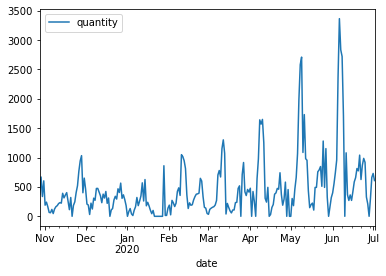

In [7]:
quantity.plot()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


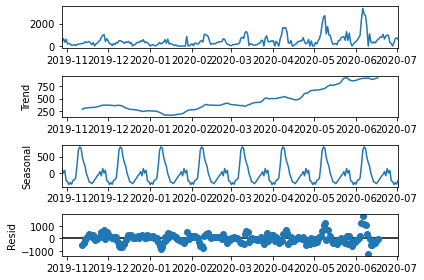

In [8]:
data_season= seasonal_decompose(quantity, model='additive',freq=30)
data_season.plot()
plt.show()

In [9]:
train, test = quantity.iloc[:200], quantity.iloc[200:]

In [10]:
model_hw = es(train, trend='add', damped=True, seasonal='add', seasonal_periods=30).fit()

C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


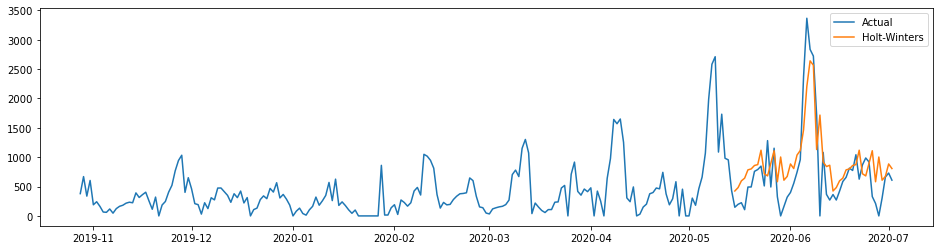

In [11]:
pred = model_hw.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(16,4))
plt.plot(quantity.index, quantity, label='Actual')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [12]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.abs(np.mean(e/y))
    return mse, rmse, mae, mape

mse, rmse, mae, mape =_measure_metric(test.values[0], pred)

print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 829215.825179659
RMSE = 910.6128843694553
MAE = 782.891795577363
MAPE = 5.312783629053767


## Grid search

In [15]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')

C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


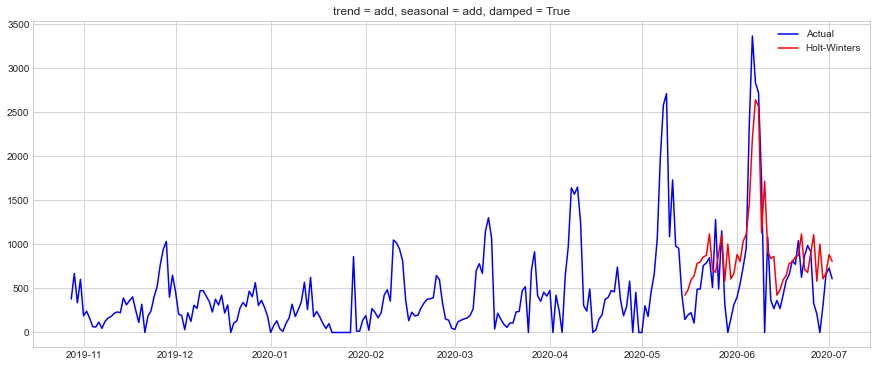

MSE = 829215.825179659
RMSE = 910.6128843694553
MAE = 782.891795577363
MAPE = 5.312783629053767


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


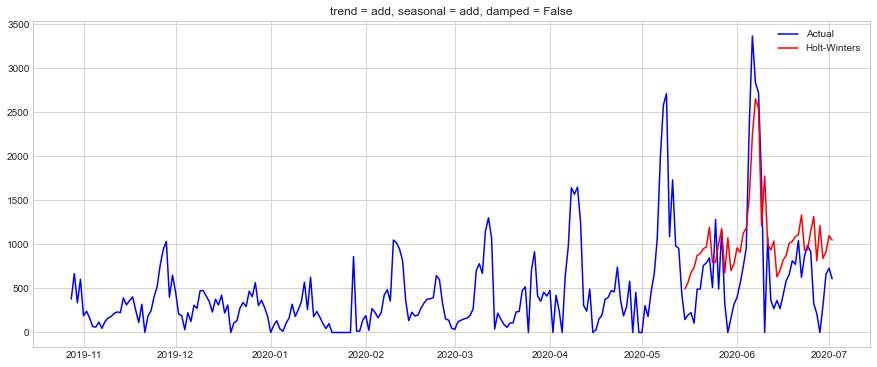

MSE = 1035345.1747159774
RMSE = 1017.5191274447756
MAE = 921.4415863741699
MAPE = 6.2529966502047385


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


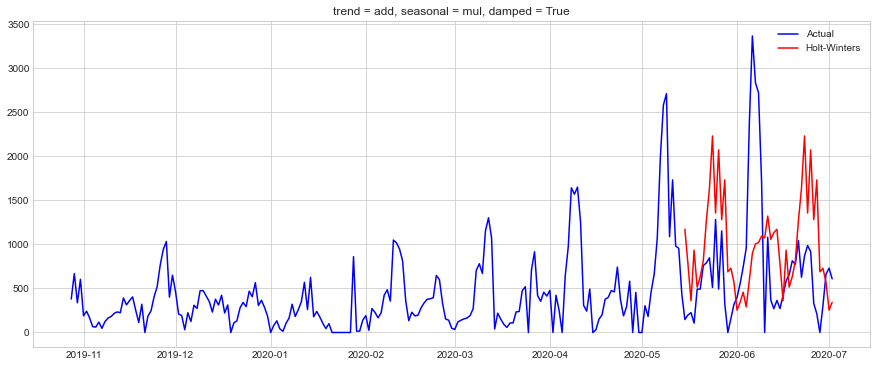

MSE = 987976.1260676667
RMSE = 993.9698818715116
MAE = 845.7773742608143
MAPE = 5.739531584288912


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


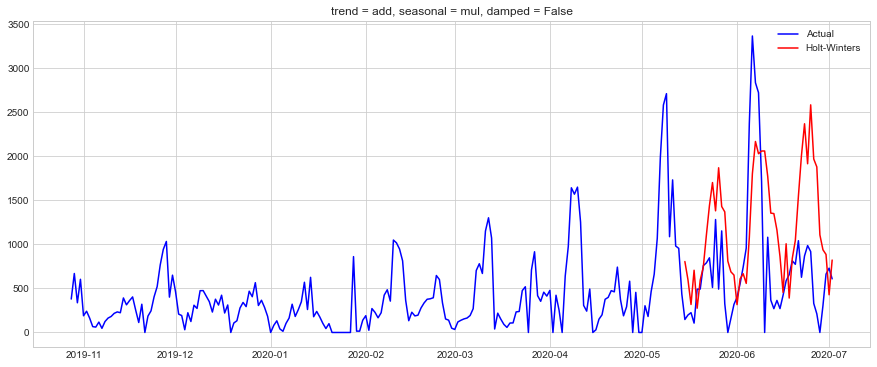

MSE = 1469474.1795691662
RMSE = 1212.2187012124364
MAE = 1046.9289699065337
MAPE = 7.104566842471046


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:913: RuntimeWarning: invalid value encountered in power
  (alphac * trended(lvls[i - 1], dampen

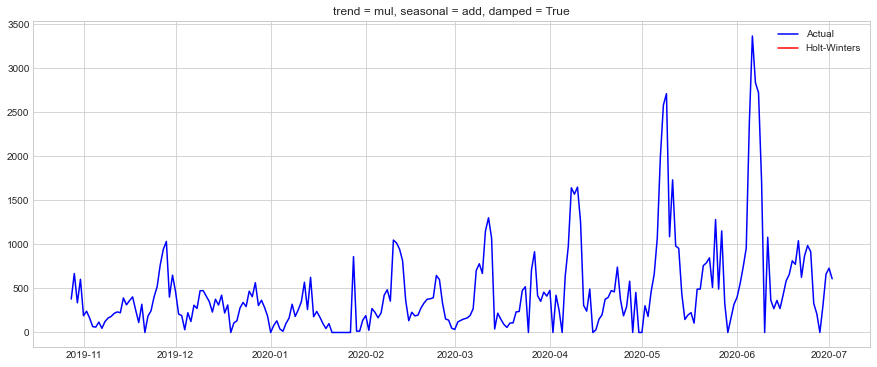

MSE = nan
RMSE = nan
MAE = nan
MAPE = nan


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


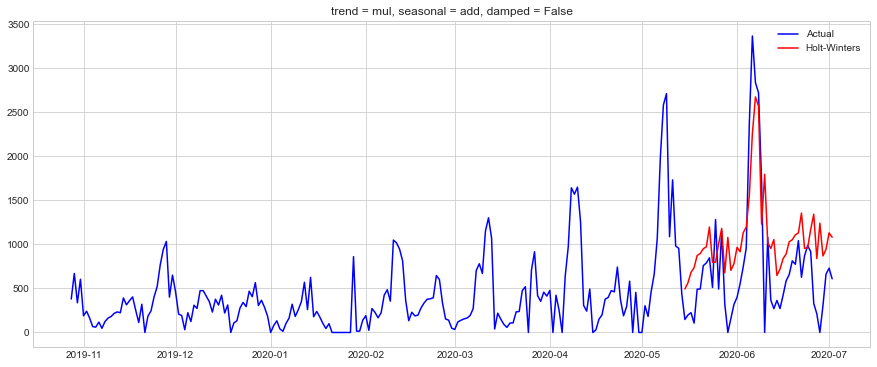

MSE = 1063000.863945638
RMSE = 1031.0193324790948
MAE = 934.3973529494177
MAPE = 6.340915804488451


C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Pham Quang Hung\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:895: RuntimeWarning: invalid value encountered in power
  (alphac * trended(lvls[i - 1], dampen

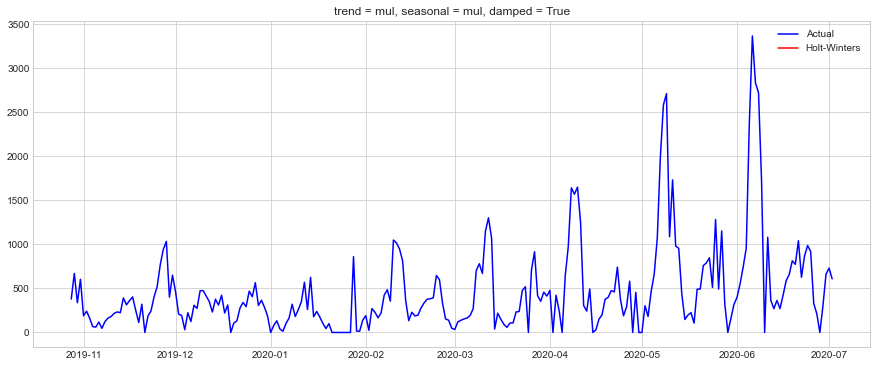

MSE = nan
RMSE = nan
MAE = nan
MAPE = nan


In [ ]:
for trend in ['add', 'mul']:
    for seasonal in ['add', 'mul']:
        for damped in [True, False]:
            model_hw = es(train, trend=trend, damped=damped, seasonal=seasonal, seasonal_periods=30).fit()
            
            pred = model_hw.predict(start=test.index[0], end=test.index[-1])
            plt.figure(figsize=(15,6))
            plt.plot(quantity.index, quantity, label='Actual', color='blue')
            plt.plot(pred.index, pred, label='Holt-Winters', color='red')
            plt.title(f'trend = {trend}, seasonal = {seasonal}, damped = {damped}')
            plt.legend(loc='best')
            plt.show()
            
            mse, rmse, mae, mape =_measure_metric(test.values[0], pred)
            print(f'MSE = {mse}')
            print(f'RMSE = {rmse}')
            print(f'MAE = {mae}')
            print(f'MAPE = {mape}')

# Cost price prediction

In [3]:
cost_price = pd.read_excel('MPHG_suvo_quantity.xlsx', sheet_name='cost_price')
cost_price.head()

,std_commodity,std_incoterms,std_size,std_value_usd_lb,std_value_usd_kg,std_active_date
0,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-08
1,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-09
2,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-10
3,BT CPTO,FOB HCM,8/12,13.75,30.31,2018-06-12
4,BT CPTO,FOB HCM,8/12,13.68,30.16,2018-06-14


In [4]:
cost_price= cost_price[['std_active_date','std_value_usd_kg']]
cost_price.columns = ['date','price'] 

In [5]:
cost_price = cost_price[cost_price['date'] > '2018-12-31']

In [6]:
date = pd.DataFrame(pd.date_range('2019-01-02', '2020-07-03'))
date.columns=['date']

In [7]:
price = cost_price.merge(date, how='right').sort_values(by=['date'])
price.head()

,date,price
0,2019-01-02,30.71
300,2019-01-03,NaN
301,2019-01-04,NaN
1,2019-01-05,30.56
2,2019-01-06,30.40


In [8]:
price['price'] = price['price'].fillna(method='bfill')

In [9]:
price = price.set_index('date')

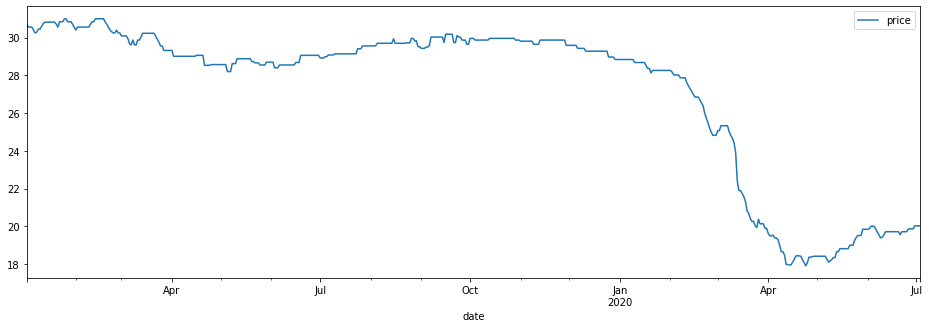

In [10]:
price.plot(figsize=(16,5))

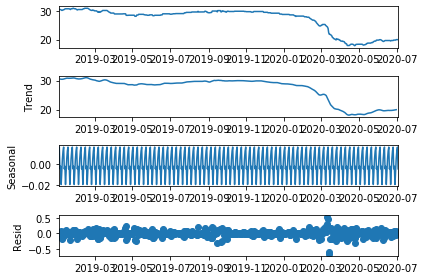

In [11]:
add_model = seasonal_decompose(price,model='additive')
add_model.plot()
plt.show()

In [12]:
train, test = price.iloc[:450], price.iloc[450:]

In [13]:
model_hwp = es(train, trend='add', damped=True, seasonal='add', seasonal_periods=45).fit()

C:\Users\Linh_Pham\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


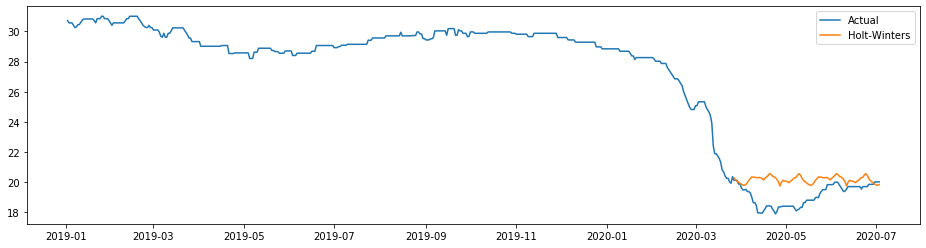

In [14]:
pred = model_hwp.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(16,4))
plt.plot(price.index, price, label='Actual')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [15]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.abs(np.mean(e/y))
    return mse, rmse, mae, mape

mse, rmse, mae, mape =_measure_metric(test.values[0], pred)

print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 0.04689633213603637
RMSE = 0.21655560980043062
MAE = 0.1829294664614744
MAPE = 0.002090288336744551
